# Mathematical Foundations for Machine Learning

## Linear Algebra Revision
- linear dependence of multiple features

<div>
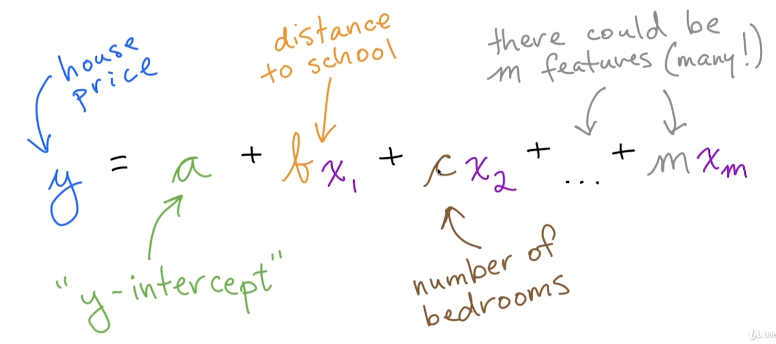
</div>

- typical regression model: we can have multiple dependincies inside the data matrix
- the model will try to find the best patterns, aka "a", "b", "b" etc coefficients, to represent all the fetaures togther, meaning the coefficients will be the same

<div>
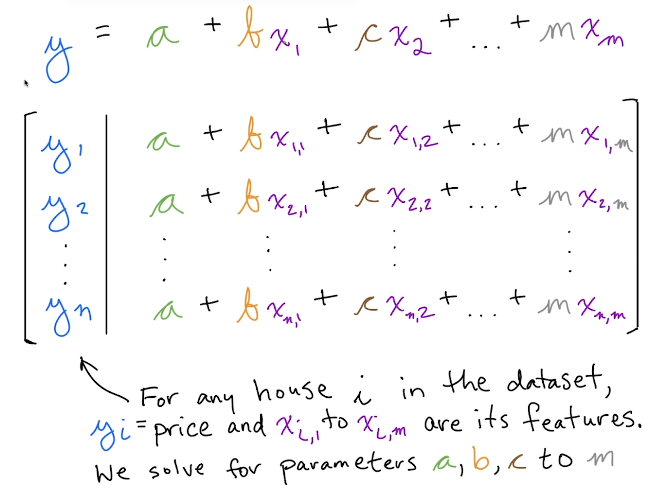
</div>

## Lets make some examples : 

### 1. Police catches a bank robber

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
t = np.linspace(0, 40, 100) # start, enf, n points

In [4]:
# LEts say a robber travelled a distance d_r
d_r = 2.5 * t

In [5]:
# Lets say the police travelled a distance d_p
d_p = 3* (t-5)

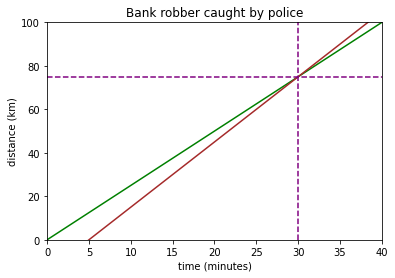

In [6]:
fig, ax = plt.subplots()
plt.title("Bank robber caught by police")
plt.xlabel("time (minutes)")
plt.ylabel("distance (km)")
ax.set(xlim=[0, 40], ylim=[0, 100])
ax.plot(t, d_r, c='green')
ax.plot(t, d_p, c='brown')
plt.axvline(x=30, color="purple", linestyle='--')
_ = plt.axhline(y=75, color="purple", linestyle='--')

### 2. Solar panels problem
- April 1st - SolarPanel_1 starts producing 1 kj/day
- May 1st - SolarPanel_2 starts producing 4 kj/day 

> Which day SolarPanel_2 has generated as much total energy as SolarPanel_1?

In [7]:
# t = days

# t = 1
SolarPanel_1 = 1 # unit = kj /day

# t = 30 days
# Solar panel 1 will have produced:
SolarPanel_1 = 30 + 1*t
# Solar anel 2 will have produced:
SolarPanel_2 = 4*t

In [8]:
# Equalizing the equation gives
t = 10
# It will be 10 days until SolarPanel_2 surpasses SolarPanel_1 in energy

> How much energy each solar panel will have produced?

In [9]:
SolarPanel_1 = 30 + 1*10
SolarPanel_1

40

In [10]:
SolarPanel_2 = 4*10
SolarPanel_2 

40

> What if Solar Panel 2 produced only 1 kj/day?

In [11]:
SolarPanel_2 = 1*t
# There are no solution to the equations! 

In [12]:
0

0

## The base for Linear Algebra: Tensors

...
<div>
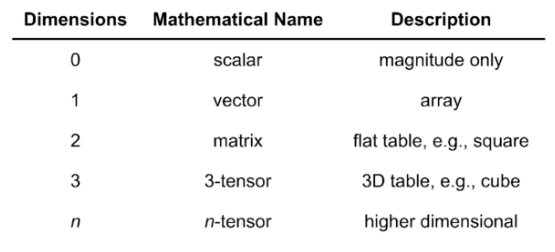
</div>

### Scalars (Rank 0 Tensors) in Base Python

In [13]:
x = 25

In [14]:
type(x)

int

In [15]:
y = 3

In [16]:
py_sum = x + y

In [17]:
py_sum

28

In [18]:
int(py_sum)

28

In [19]:
x_float = 0.25

In [20]:
py_sum = x_float +y
py_sum # defaults to float

3.25

### Scalars in Pytorch
- behave like ndarrays
- better for GPU operations

In [21]:
import torch

In [22]:
x_pt = torch.tensor(25, dtype=torch.float16)
x_pt

tensor(25., dtype=torch.float16)

In [23]:
x_pt.shape

torch.Size([])

### Scalars in TensorFlow
- Tensors created with a wrapper:

`tf.Variable` - most used!

`tf.constant`

`tf.placeholder`

`tf.SparseTensor`

In [24]:
import tensorflow as tf

In [25]:
x_tf = tf.Variable(25, dtype=tf.int16)
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=25>

In [26]:
x_tf.shape

TensorShape([])

In [27]:
y_tf = tf.Variable(3, dtype=tf.int16)
y_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=3>

In [28]:
x_tf + y_tf

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [29]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum

<tf.Tensor: shape=(), dtype=int16, numpy=28>

### Vectors! (Rank 1) in Numpy

In [30]:
import numpy as np

In [31]:
x = np.array([25, 2, 5], dtype="float16")
x

array([25.,  2.,  5.], dtype=float16)

In [32]:
len(x)

3

In [33]:
x.shape

(3,)

In [34]:
type(x)

numpy.ndarray

In [35]:
x[0]

25.0

In [36]:
type(x[0])

numpy.float16

### Vector Transposition

In [37]:
x_t = x.T
x_t # there is no second dimension, so no transpose

array([25.,  2.,  5.], dtype=float16)

In [38]:
x_t.shape # there is no second dimension, so no transpose

(3,)

In [39]:
# nested [] to add a second dimension
x = np.array([[25, 2, 5]], dtype="float16")

In [40]:
x

array([[25.,  2.,  5.]], dtype=float16)

In [41]:
x.T # real transpose!

array([[25.],
       [ 2.],
       [ 5.]], dtype=float16)

### Zero Vectors
- Have no effect if added to another

In [42]:
np.zeros(3)

array([0., 0., 0.])

### Vectors in Pytorch and TensorFlow

In [43]:
x_pt = torch.tensor([25, 2, 5])
x_pt # pytorch

tensor([25,  2,  5])

In [44]:
x_tf = tf.Variable([25, 2, 5])
x_tf # tensorflow

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5])>

## Norms and Unit Vectors

### $L^2$ Norm

In [45]:
x

array([[25.,  2.,  5.]], dtype=float16)

In [46]:
# L2 norm - Eucledian distance to origin
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [47]:
# same with numpy embedded function
np.linalg.norm(x)

25.58

### Unit Vector
- vector of magnitude 1!

### $L^1$ Norm
- good for differenciating between zero et non zero elements

In [48]:
x

array([[25.,  2.,  5.]], dtype=float16)

In [49]:
# L1 norm
np.abs(25) + np.abs(2) + np.abs(5)

32

### Squared $L^2$ Norm
- computationally cheaper!
- derivative of one element does not depend on the others! at it is for $L^2$ norm

In [50]:
(25**2 + 2**2 + 5**2) # derivative is element independent

654

### Max Norm ($L^{\infty}$ Norm) 
- Takes the abs value of each element and finds the max value
- Less common used

In [51]:
x

array([[25.,  2.,  5.]], dtype=float16)

In [52]:
np.max([np.abs(25), np.abs(2), np.abs(5)])

25

### Generalized $L^p$ Norm

- $||x||_p = (\sum|x_i|^p)^{1/p}$

- $p$ is a real number, greater or equal to one!
- $L^1$ and $L^2$ penalties are used in ML to regularize objective functions!

### Basis Vectors
- can be scaled to represent anu vector in a given vector space
- typically use unit vectors along axes of vector space

### Orthogonal Vectors
- $x$ and $y$ are orthogonal vectors if $x^T.y = 0$
- 90° angle to each other
- $n$-dimensional space has max $n$ mutually orthogonal vectors

In [53]:
i = np.array([1, 0])
i

array([1, 0])

In [54]:
j = np.array([0, 1])
j

array([0, 1])

In [55]:
np.dot(i, j)

0

## Matrices
- two dimensional array of numbers
- denoted in upper-case e. g. $X$
- $[n_{row}, n_{col}]$

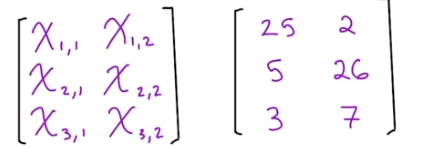

### Matrices in Numpy

In [56]:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [57]:
X.shape

(3, 2)

In [58]:
X.size # total number of elements

6

In [59]:
X[:,0] # index at zero

array([25,  5,  3])

In [60]:
X[1,:] # all columns of second row

array([ 5, 26])

In [61]:
X[0:2, 0:2] # two first elemnts 

array([[25,  2],
       [ 5, 26]])

### Matrices in PyTorch

In [63]:
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [64]:
X_pt.shape # more pythonic

torch.Size([3, 2])

In [65]:
X_pt[1,:]

tensor([ 5, 26])

### Matrices in TensorFlow

In [66]:
X_tf = tf.Variable([[25,2], [5, 26], [3, 7]])
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]])>

In [67]:
tf.rank(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [68]:
tf.shape(X_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 2])>

In [69]:
X_tf[1, :]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 5, 26])>

## Generic Tensor Notation - Higher-Rank Tensors
- Upper-case, bold, italics, sans serif, e. g. $\textit{X}$

### Rank 4 tensors are common for images, where each dimensions orresponds to:
1. Number of images in training batch, e.g.32
2. Image height in pixels, e. g. 28 for MNISY digits;
3. Image width in pixels, e. g. 28
4. Number of color channels, e. g., 3 for full-color images (RGB)

In [70]:
images_pt = torch.zeros([32, 28, 28, 3])
images_pt

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         ...,

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0.

In [72]:
images_tf = tf.zeros([32, 28, 28, 3]) 
images_tf

<tf.Tensor: shape=(32, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


   

## Tensor Operations

### Transposition

In [73]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [74]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [75]:
tf.transpose(X_tf)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]])>

In [76]:
X_pt.T # more pythonic

tensor([[25,  5,  3],
        [ 2, 26,  7]])

### Basic Tensor Aritmethic

In [77]:
X*2

array([[50,  4],
       [10, 52],
       [ 6, 14]])

In [78]:
X+2

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [79]:
X*2+2

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [81]:
X_pt*2+2

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [85]:
torch.add(torch.mul(X_pt, 2), 2) # explicitly using PyTorch way

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [86]:
X_tf*2+2

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]])>

In [87]:
tf.add(tf.multiply(X_tf, 2), 2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]])>

If two tensors have the same size, operations are often by default applied element-wise.
This is **not** matrix multiplication! It is called **Hadamard product** or simply the **element-wise product**.

The mathemathical notation is $A \bigodot X$

In [88]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [89]:
A = X + 2
A

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [90]:
A + X

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [91]:
A * X

array([[675,   8],
       [ 35, 728],
       [ 15,  63]])

In [93]:
A_pt = X_pt + 2
A_pt

tensor([[27,  4],
        [ 7, 28],
        [ 5,  9]])

In [94]:
A_pt * X_pt

tensor([[675,   8],
        [ 35, 728],
        [ 15,  63]])

In [96]:
A_tf = X_tf + 2
A_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[27,  4],
       [ 7, 28],
       [ 5,  9]])>

In [97]:
A_tf * X_tf 

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[675,   8],
       [ 35, 728],
       [ 15,  63]])>

### Reduction
Calculating the sum accross all elements of a tesnor is a common operation.
- For vector **_x_** of length *n*, we calculate $\sum^n_{i=1} x_i$
- For matrix **_X_** with *m* by *n* dimensions, we calculate $\sum^m_{j=1} \sum^n_{i=1} x_i$

In [99]:
X.sum()

68

In [100]:
torch.sum(X_pt)

tensor(68)

In [101]:
tf.reduce_sum(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=68>

In [102]:
X.sum(axis=0) # summing all rows

array([33, 35])

In [103]:
X.sum(axis=1) # sum all columns

array([27, 31, 10])

In [105]:
torch.sum(X_pt, 0)

tensor([33, 35])

In [106]:
tf.reduce_sum(X_tf, 1)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([27, 31, 10])>

In [107]:
X.mean()

11.333333333333334

In [108]:
X.min()

2

In [109]:
X.max(axis=1)

array([25, 26,  7])

### Dot Product
- $x \cdot y$ = $\sum^n_{i=1} x_iy_i$
- very important for deep learning! it is performed in every artifical neuron of a deep learning network. and one neural network can have millions of these neurons.

In [114]:
x

array([[25.,  2.,  5.]], dtype=float16)

In [111]:
y = np.array([0, 1, 2])
y

array([0, 1, 2])

In [112]:
25*0 + 2*1 + 5*2

12

In [115]:
np.dot(x, y)

array([12.])

In [117]:
# np.dot(X, y) # this does not work! need to have the complementary shapes

In [118]:
x_pt

tensor([25,  2,  5])

In [119]:
y_pt = torch.tensor([0, 1, 2])
y_pt

tensor([0, 1, 2])

In [121]:
torch.dot(x_pt, y_pt)

tensor(12)

In [122]:
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5])>

In [123]:
y_tf = tf.Variable([0, 1, 2])
y_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([0, 1, 2])>

In [124]:
tf.reduce_sum(tf.multiply(x_tf, y_tf))

<tf.Tensor: shape=(), dtype=int32, numpy=12>

## Solving Linear Equations

In [125]:
x = np.linspace(-10, 10, 1000)

In [126]:
y1 = 3 * x

In [127]:
y2 = 1 + (5*x)/2

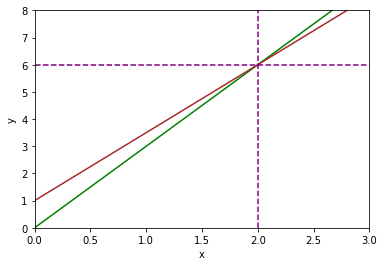

In [129]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set(xlim=([0, 3]), ylim=[0, 8])
ax.plot(x, y1, c='green')
ax.plot(x, y2, c='brown')
plt.axvline(x=2, color='purple', linestyle='--')
_ = plt.axhline(y=6, color='purple', linestyle='--')

## Matrix Properties

### Frobenius Norm
- analogous to the $L^2$ norm of vectors
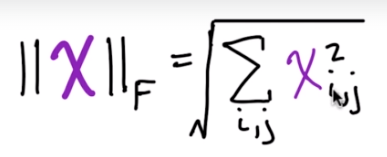

In [130]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [132]:
(25**2 + 2**2 + 5**2 + 26**2 + 3**2 + 7**2)**(1/2)

37.255872020394314

In [131]:
np.linalg.norm(X)

37.255872020394314

In [137]:
X_pt = torch.tensor([[25.,  2], # adding one float
                     [ 5, 26],
                     [ 3,  7]])

In [138]:
torch.norm(X_pt) # requires float type

tensor(37.2559)

In [140]:
X_tf = tf.Variable([[25.,  2], # adding one float
                     [ 5, 26],
                     [ 3,  7]])

In [141]:
tf.norm(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=37.25587>

### Matrix Multiplication!
- Most important operation
- the number of columns of one matrix need to be the same as the number of rows of the other matrix
<div>
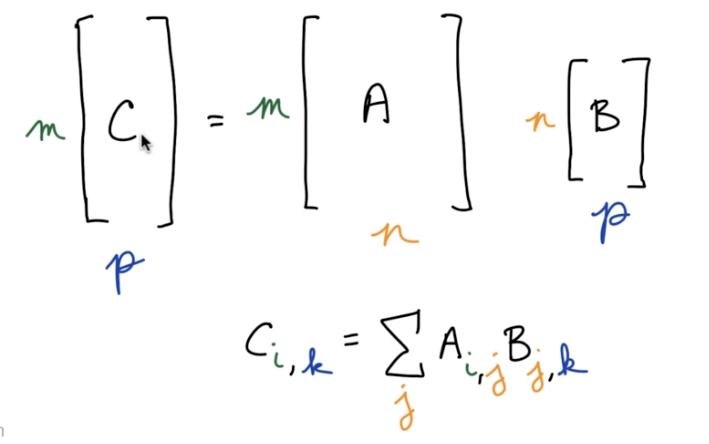
</div>

<div>
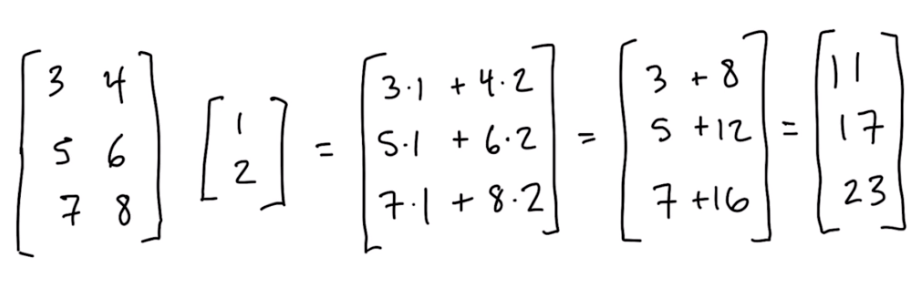
</div>

In [142]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [143]:
b = np.array([1, 2])
b

array([1, 2])

In [144]:
np.dot(A, b) # dot product only for vectors but numpy uses also for matrices

array([11, 17, 23])

In [145]:
A_pt = torch.tensor(A)
A_pt

tensor([[3, 4],
        [5, 6],
        [7, 8]], dtype=torch.int32)

In [146]:
b_pt = torch.tensor(b)
b_pt

tensor([1, 2], dtype=torch.int32)

In [147]:
torch.matmul(A_pt, b_pt) # pytorch implies by itself what are tje dimensions of the matrixes

tensor([11, 17, 23], dtype=torch.int32)

In [148]:
A_tf = tf.Variable(A_pt)
A_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[3, 4],
       [5, 6],
       [7, 8]])>

In [150]:
b_tf = tf.Variable(b_pt)
b_tf

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2])>

In [153]:
tf.linalg.matvec(A_tf, b_tf) # needs to tell tensorflow if it is matvec or matmat multiplication

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([11, 17, 23])>

For a more than one columns "matrix", the fisrt column is the same as the if it was only one column vector.

<div>
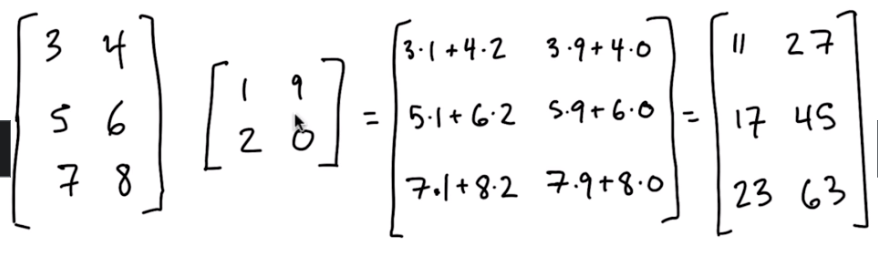
</div>


In [154]:
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [155]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [156]:
np.dot(A, B) # first column is the same as the result above for one vector

array([[11, 27],
       [17, 45],
       [23, 63]])

In [161]:
B_pt = torch.from_numpy(B) # much cleaner than tf conversion
B_pt

tensor([[1, 9],
        [2, 0]], dtype=torch.int32)

In [159]:
# another way to create the same matrix using transpose
B_pt = torch.tensor([[1, 2], [9, 0]]).T
B_pt

tensor([[1, 9],
        [2, 0]])

In [162]:
torch.matmul(A_pt, B_pt) # no need to change functions, unlike TF

tensor([[11, 27],
        [17, 45],
        [23, 63]], dtype=torch.int32)

In [163]:
B_tf = tf.convert_to_tensor(B, dtype=tf.int32)
B_tf

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 9],
       [2, 0]])>

In [164]:
tf.matmul(A_tf, B_tf)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 27],
       [17, 45],
       [23, 63]])>

### Real world machine learning example

goes until $x_{n, m-1}$ not just m
<div>
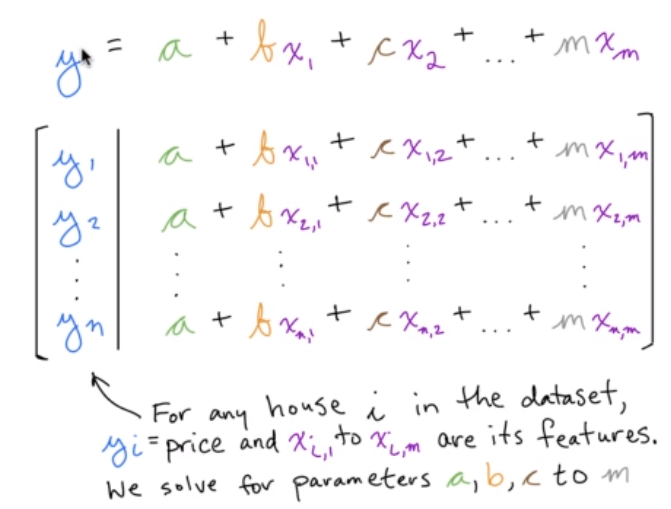
</div>

**matrix multiplication**: for a regression model, in which we want to solve for each parameter by multiplying these parameters (column vector) by each row of the features matrix, in order to obtain the $y$ labels (resulting column vector).
<div>
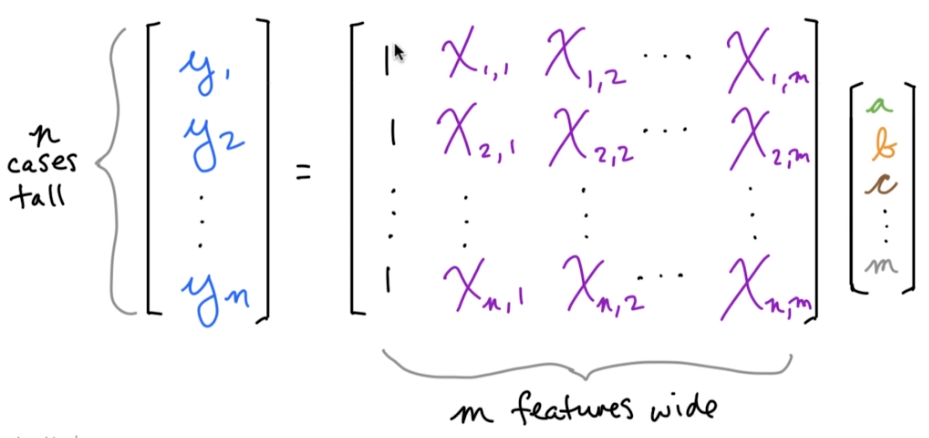
</div>

### Matrices types

#### Symmetric matrices

In [169]:
M = np.array([[0, 1, 2], [1, 7, 8], [2, 8, 9]])
M

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [170]:
M.T

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [171]:
M == M.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

#### Identity Matrix

In [173]:
M = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
M

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [174]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [175]:
torch.matmul(M, x_pt) # exactly the same vector

tensor([25,  2,  5])

### Matrix Inversion
- etter, more convenient approach for solving linear equations
- alternative to manually solving with substitution or elimination
- $X^{-1}$
- in a regression model: $y=Xw$ where $w$ is the weights $a$ through $m$
- $y$ could be house prices, $X$ could be the predictors/features like bedroom counts, $w$ contains the unknows - the model's learnable parameters

<div>
<img src="attachment:image.png" width="400"/>
</div>

<div>
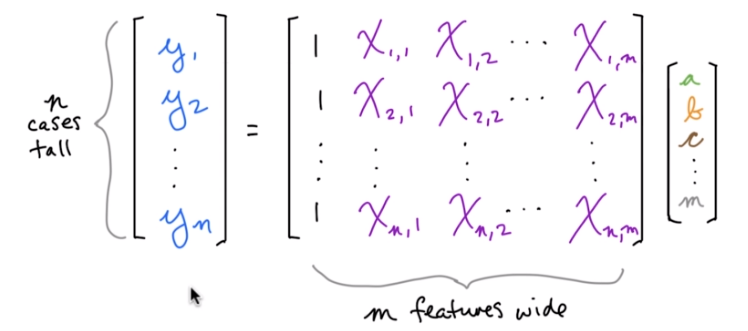
</div>

Assuming $X^{-1}$ exists, matrix inversion can solve for $w$ as:

$Xw=y$

$X^{-1}Xw=X^{-1}y$

$I_nw=X^{-1}y$

$w=X^{-1}y$

- each equation is a data point, one house fetaures + price
- $b$ and $c$ are the unknown variables/parameters the model will try to solve
<div>
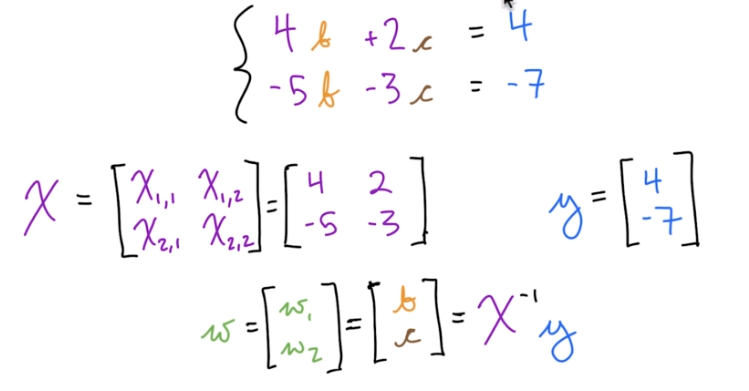
</div>

In [184]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [185]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [186]:
y = np.array([4, -7])
y

array([ 4, -7])

In [187]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that $y=Xw$:

In [188]:
np.dot(X, w) # gives y!

array([ 4., -7.])

In Pytorch and TensorFlow:

In [190]:
torch.inverse(torch.tensor([[4, 2], [-5, -3.]])) # has to be float

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [193]:
tf.linalg.inv(tf.Variable([[4, 2], [-5, -3.]])) # has to be float

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.4999998,  0.9999998],
       [-2.4999995, -1.9999996]], dtype=float32)>

**Attention**: all columns of matrix need to be linearly independent
- if one columns is [1, 2] and another is [2, 4] is not good! they are dependent by a factor of 2 - the solutions for the equations will be parallel to each other
- if a second column is also [1, 2], the results will overlap, meaing they will have infinity solutions
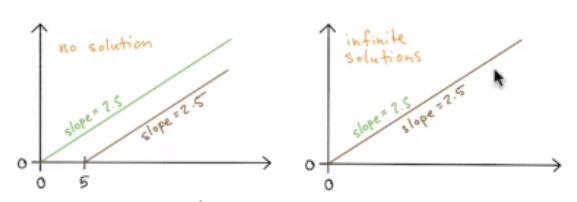

- matrix need to be square: $n_{row} = n_{col}$ - the matrix inverse is not possible to be calculated as there will be mayn answers (overdeterminated, result lines cross in many points, $n_{row} > n_{col}$) or no answers (undeterminated, no lines cross, $n_{row} < n_{col}$). The solutions is to do another type of matrix solving that does not include matrix inversion
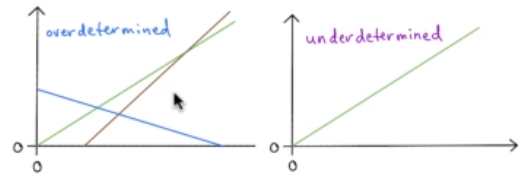

**overdetermination**: many more samples than features, e.g.: a thousand of house prices and only a dozen of unknowns 

**underdetermination**: happens in Deep Learning, e.g.: you have tens of thousands data points but you have millions or billions of parameters in your model.

### Matrix Inversion with no solution

In [194]:
X = np.array([[-4, 1], [-8, 2]]) # singular matrix = second line is parallel to first line
X

array([[-4,  1],
       [-8,  2]])

In [196]:
# Xinv = np.linalg.inv(X) # this does not work

### Diagonal Matrix
- nonzero elements along main diagonal, zeros everywhere
- identity matrix is one example
- why is important? $diag(x)$ where $x$ is vector of main diagonal elements
    - multiplication $diag(x)y=x\bigodot y$
    - inversion: $diag(x)^{-1} = diag[1/x_1, ..., 1/x_n]^T$
    - even if the height or width of the matrix is non-square, it is still computationally efficient as we can add zeros to the product

### Orthogonal Matrix
- Orthonormal vectors make all rows and columns: all columns vectors produce a unit norm
- Orthogonal vectors: dot product between all columns needs to the zero
- This means that: $A^TA=AA^T=I$ which also means: $A^T=A^{-1}I=A^{-1}$
- Calculation $A^T$ is fast and cheap, therefore so is calculations $A^{-1}$

<div>
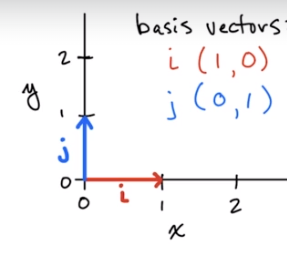
</div>

In [198]:
I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [200]:
column_1 = I[:, 0]
column_1

array([1, 0, 0])

In [203]:
column_2 = I[:, 1]
column_2

array([0, 1, 0])

In [202]:
column_3 = I[:, 2]
column_3

array([0, 0, 1])

In [204]:
np.dot(column_1, column_2) # each dot product of any pair of vectors is 0, so orthogonal

0

In [205]:
np.dot(column_1, column_3)

0

In [207]:
np.dot(column_3, column_2)

0

In [209]:
# Lets check the norm of the vectors as well
# they are all unit norm
np.linalg.norm(column_1), np.linalg.norm(column_2), np.linalg.norm(column_3)

(1.0, 1.0, 1.0)

In [212]:
# Lets check another matrix
K = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

column_1 = K[:, 0]
column_2 = K[:, 1]
column_3 = K[:, 2]

print(np.linalg.norm(column_1), np.linalg.norm(column_2), np.linalg.norm(column_3))

print(np.dot(column_1, column_2))
print(np.dot(column_1, column_3))
print(np.dot(column_3, column_2))

1.0 1.0 1.0
0
0
0


In [215]:
# in a single line of code
torch.matmul(torch.tensor(K).T, torch.tensor(K))

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]], dtype=torch.int32)

## Eingenvectors and Eigenvalues

**Importance of Modern Linear Algebra**: 
- solving for unknowns in ML and DL
- Reducing dimensionality (e.g. Principal Component Analysis)
- Ranking results
- Recommenders (e.g. Singular Value Decomposition)
- Natural language processing (e.g. SVD, matrix factorization)

### Eigenvector decomposition: Eigendecomposition


#### Affine Transformation via Matrix Application

In [216]:
v = np.array([3, 1])
v

array([3, 1])

In [70]:
import matplotlib.pyplot as plt

In [69]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each.
    
    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] contains
        two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display 
        the first vector in red and the second in blue.
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')
    
    for i in range(len(vectors)):
        x = np.concatenate([[0,0], vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                  angles='xy', scale_units='xy', scale=1, color=colors[i],)

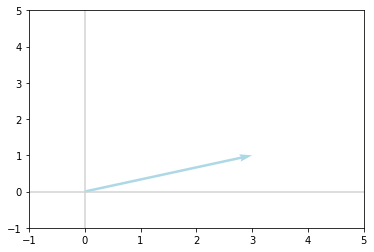

In [220]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In [221]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [223]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [224]:
v == Iv

array([ True,  True])

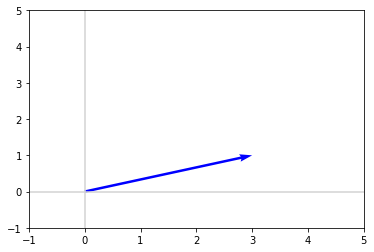

In [226]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In constrat to the identity matrix, let's consider matrix $E$ that flips vectors over the $x$-axis.

In [227]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [228]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

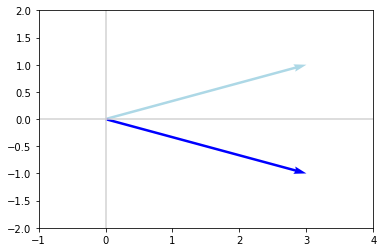

In [232]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 4)
_ = plt.ylim(-2, 2)

Another matrix $F$ that flips the vectors over the $y$-axis:

In [234]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [235]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

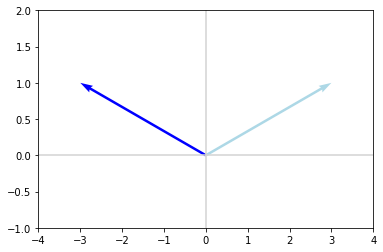

In [238]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 2)

**affine transformation**: change in geommetry that may adjust distances or angles between vectors, but preserves parallelism between them.
- scalling: shaping the length 
- shearing
- rotation

In [239]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [240]:
Av = np.dot(A, v)
Av

array([1, 4])

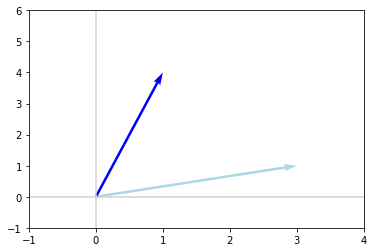

In [246]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 4)
_ = plt.ylim(-1, 6)

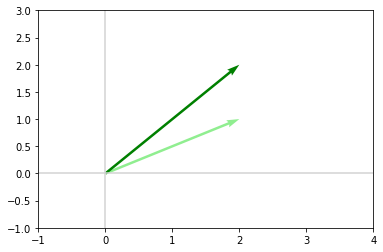

In [248]:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 4)
_ = plt.ylim(-1, 3)

We can concatenate several vectors together into a matrix (say, $V$), where each column is a separated vector.
Whateveer linear transformations we apply to $V$ will be independently applied to each column (vector).

In [249]:
v

array([3, 1])

In [258]:
v2

array([2, 1])

In [255]:
np.matrix(v).T

matrix([[3],
        [1]])

In [251]:
v3 = np.array([-3, -1])
v4 = np.array([-1, 1])

In [259]:
V = np.concatenate((np.matrix(v).T, 
                    np.matrix(v2).T, 
                    np.matrix(v3).T,
                    np.matrix(v4).T), axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [263]:
I

array([[1, 0],
       [0, 1]])

In [261]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [264]:
A

array([[-1,  4],
       [ 2, -2]])

In [262]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [71]:
# function to convert column of matrix to 1D vector:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:, clmn]).reshape(-1)

In [268]:
vectorfy(V, 0)

array([3, 1])

In [269]:
vectorfy(V, 0) == v

array([ True,  True])

(-5.0, 5.0)

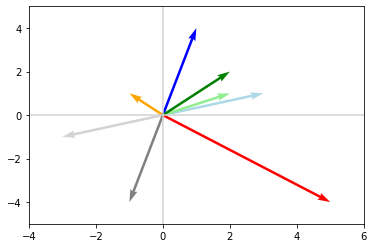

In [271]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3), # plotting columns of matrix V
              vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], # plotting columns of matrix AV
            ['lightblue', 'lightgreen', 'lightgray', 'orange', # before
             'blue', 'green', 'gray', 'red']) # after
plt.xlim(-4, 6)
plt.ylim(-5, 5)

One vector can be modified much more than others, like vector red.

#### Eigenvectors and Eigenvalues

Eigenvectors:

- red and blue are eigenvectors of the flipping matrix!
- they remain with the same direction as before the flip

Eigenvalues:

- scalar values that describe how much the eigenvector has changed after applying the matrix
- $= 1$ for this case

<div>
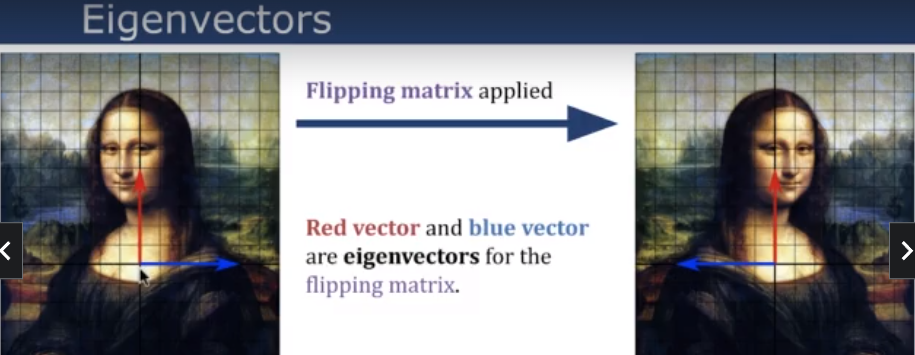
</div>


**Applying a shearing matrix**

Eigenvectors:

- the red vector knocked off span
- red vector is no longer eigenvector

Eigenvalues:

- if eigenvector doubled in length, eigenvalue $= 2$
- if it halves, eigenvector $= 0.5$

<div>
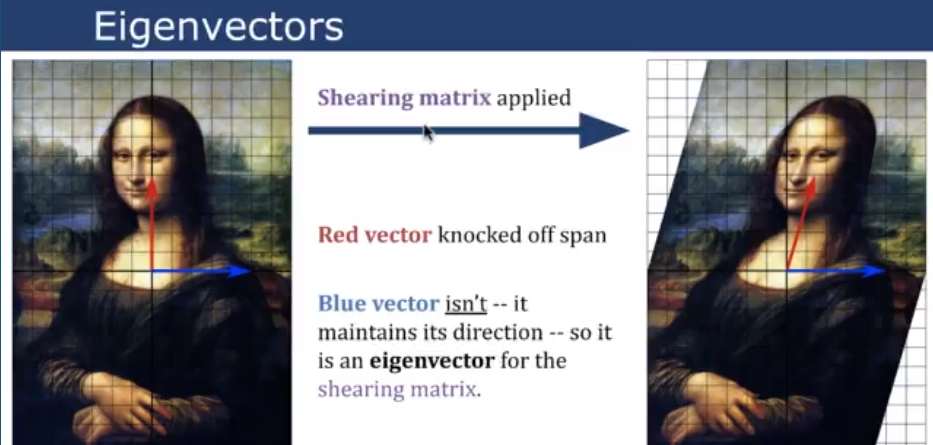
</div>

The major consequence is:

$Av = \lambda v$

$A$ being some matrix, $v$ the eigenvector and $\lambda$ the eigenvalue.

In [272]:
A

array([[-1,  4],
       [ 2, -2]])

Numpy's `eig()` method returns a tuple of : 
- a vector of eigenvalues
- a matrix of eigenvectors

In [273]:
lambdas, V = np.linalg.eig(A)

In [274]:
# The matrix contains as many eigenvectors as there are columns of A
V # each column is a separated eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [275]:
# with a corresponding eigenvalue for each eigenvector
lambdas

array([ 1.37228132, -4.37228132])

Lets now confirm $Av=\lambda v$:

In [276]:
v = V[:, 0]
v

array([0.86011126, 0.51010647])

In [277]:
lambduh = lambdas[0]
lambduh

1.3722813232690143

In [279]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [280]:
lambduh * v

array([1.18031462, 0.70000958])

Same results!

(-1.0, 2.0)

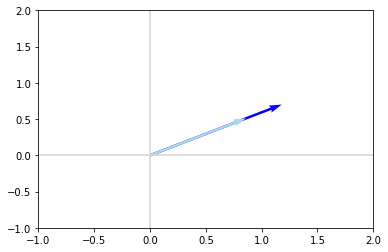

In [281]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
plt.ylim(-1, 2)

The amount that has been added on the lightblue vector, is the value of the eigenvalue.

In [283]:
v2 = V[:, 1]
v2

array([-0.76454754,  0.64456735])

In [285]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [286]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [287]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

(-3.0, 2.0)

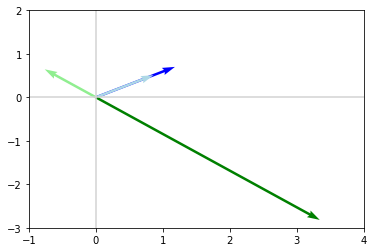

In [288]:
plot_vectors([Av, v, Av2, v2],
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
plt.ylim(-3, 2)

Using the PyTorch `eig` method:

In [293]:
A

array([[-1,  4],
       [ 2, -2]])

In [308]:
A_p = torch.tensor([[-1,  4], [ 2, -2.]], dtype=torch.float64) # must by float
A_p

tensor([[-1.,  4.],
        [ 2., -2.]], dtype=torch.float64)

In [311]:
torch.linalg.eig(A_p)

torch.return_types.linalg_eig(
eigenvalues=tensor([ 1.3723+0.j, -4.3723+0.j], dtype=torch.complex128),
eigenvectors=tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]], dtype=torch.complex128))

In [320]:
eigenval, eigenvec = torch.linalg.eig(A_p) 
eigenval

tensor([ 1.3723+0.j, -4.3723+0.j], dtype=torch.complex128)

In [327]:
eigenvec

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]], dtype=torch.complex128)

In [328]:
Av_p = torch.matmul(A_p.float(), eigenvec[:, 0].float())
Av_p

tensor([1.1803, 0.7000])

In [345]:
Av2_p = torch.matmul(A_p.float(), eigenvec[:, 1].float())
Av2_p

tensor([ 3.3428, -2.8182])

In [348]:
lambda2 = eigenval[0].float() * eigenvec[:, 1].float()
lambda2

tensor([-1.0492,  0.8845])

In [340]:
Av_p

tensor([1.1803, 0.7000])

In [342]:
Av2_p

tensor([-1.0492,  0.8845])

In [337]:
eigenvec[:, 0]

tensor([0.8601+0.j, 0.5101+0.j], dtype=torch.complex128)

(-3.0, 2.0)

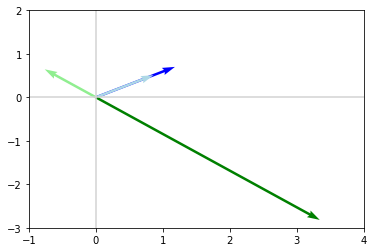

In [346]:
plot_vectors([Av_p, eigenvec[:, 0].float(), Av2_p, eigenvec[:, 1].float()],
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
plt.ylim(-3, 2)

**What's the case for eigenvectors of + than 2 dimensions?**

In [6]:
import numpy as np

In [7]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [351]:
lambdas_X, V_X = np.linalg.eig(X)

In [352]:
V_X # one eigenvector per column of X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [353]:
lambdas_X # a corresponding eigenvalue for each eigenvector

array([29.67623202, 20.62117365, -0.29740567])

Let's confirm $Xv = \lambda v$ :

In [354]:
v_X = V_X[:, 0]
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [355]:
lambda_X = lambdas_X[0]
lambda_X

29.676232023948902

In [357]:
np.dot(X, v_X) # Matrix multiplication

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [358]:
lambda_X * v_X # it is the same result!

array([-21.12227645, -19.77983919,  -6.5792208 ])

Proving $Xv=\lambda v$ using Pytorch:

In [2]:
import torch

In [10]:
X_p = torch.tensor([[25.,  2,  9],
                    [ 5, 26, -5],
                    [ 3,  7, -1]])
X_p

tensor([[25.,  2.,  9.],
        [ 5., 26., -5.],
        [ 3.,  7., -1.]])

In [24]:
eigenval, eigenvec = torch.linalg.eig(X_p) 

In [25]:
# eigenval = eigenval.float()
eigenval

tensor([29.6762+0.j, 20.6212+0.j, -0.2974+0.j])

In [22]:
eigenvec

tensor([[ 0.7118+0.j,  0.6502+0.j, -0.3422+0.j],
        [ 0.6665+0.j, -0.7446+0.j,  0.2379+0.j],
        [ 0.2217+0.j, -0.1509+0.j,  0.9090+0.j]])

In [31]:
v0_p = eigenvec[:, 0].float()
v0_p

tensor([0.7118, 0.6665, 0.2217])

In [32]:
v1_p = eigenvec[:, 1].float()
v1_p

tensor([ 0.6502, -0.7446, -0.1509])

In [33]:
v2_p = eigenvec[:, 2].float()
v2_p

tensor([-0.3422,  0.2379,  0.9090])

In [35]:
X_v0 = torch.matmul(X_p, v0_p)
X_v0

tensor([21.1223, 19.7798,  6.5792])

In [37]:
X_v1 = torch.matmul(X_p, v1_p)
X_v1

tensor([ 13.4077, -15.3554,  -3.1110])

In [38]:
X_v2 = torch.matmul(X_p, v2_p)
X_v2

tensor([ 0.1018, -0.0708, -0.2703])

In [40]:
eigenval[0].float() * v0_p # same as above!

tensor([21.1223, 19.7798,  6.5792])

In [41]:
eigenval[1].float() * v1_p # same as above!

tensor([ 13.4077, -15.3554,  -3.1110])

In [42]:
eigenval[2].float() * v2_p # same as above!

tensor([ 0.1018, -0.0708, -0.2703])

### Matrix Determinants
- Map square matrix to scalar!
- Enable to determine wheter a matrix can be inverted
- matrix $X$ is denoted as $det(X)$
    - If $det(X) = 0$:
         - Matrix $X^{-1}$ cannot be computed because $1/det(X) = 1/0$
         - Matrix $X^{-1}$ is singular (contains linearly independent columns)
         
<div>
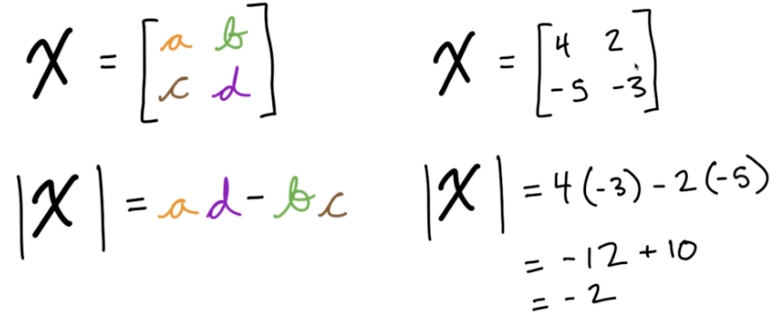
</div>       

**2x2 Matrix Determinants**

In [44]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [47]:
np.linalg.det(X) # same as the example in markdown

-2.0000000000000013

In [48]:
not_inv = np.array([[-4, 1], [-8, 2]]) # parallel rows!
not_inv

array([[-4,  1],
       [-8,  2]])

In [49]:
np.linalg.det(not_inv) # deterlinante is zero

0.0

In [51]:
# np.linalg.inv(not_inv) # this does not work! the rows are not in dependent

### Generalizing Determinants: Recursion

<pre>
<div>
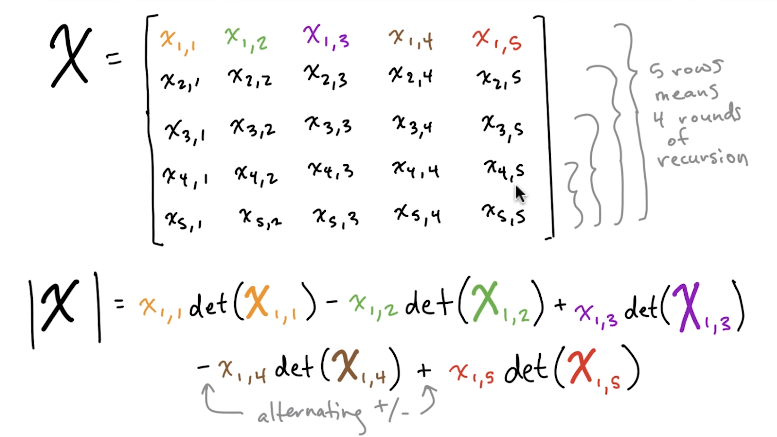
</div>

<div>
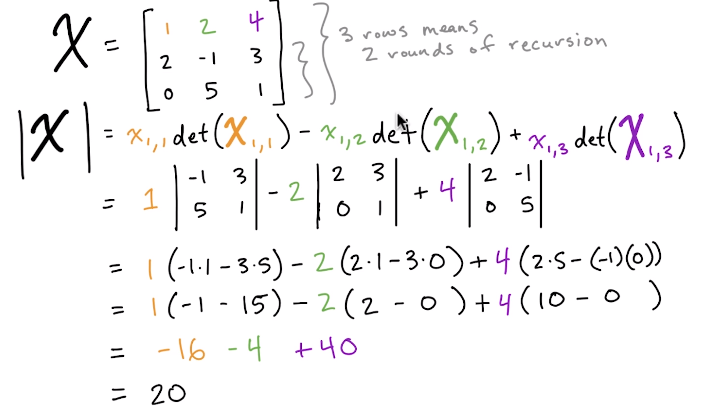
</div>
</pre>


In [54]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [55]:
np.linalg.det(X)

19.999999999999996

### Determinants and Eigenvalues!
$det(X)$ = product of all eigenvalues of $X$

$|det(X)|$ - quantifies the volume change as a result of applying $X$:
- if $det(X) = 0$, then $X$ collapses space completely in at least one dimension (elimitating all volume)
- if $0 < |det(X)| <1$, then $X$ contracts the volume
- if $|det(X)| = 1$, then $X$ preserves the volume exactly
- if $|det(X)| > 1$, then $X$ expands the volume

In [61]:
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [64]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [65]:
np.product(lambdas)

19.99999999999999

In [66]:
np.abs(np.linalg.det(X))

19.999999999999996

Let's play with different matrices with different $|det(M)|$

In [67]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

(-1.0, 3.0)

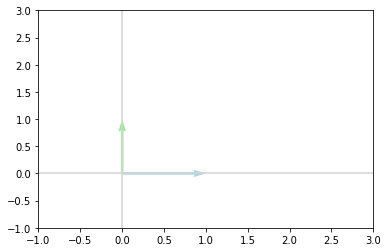

In [73]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)

Multiplying by a singular matrix should collapse the basis vectors into one dimension:

In [76]:
# N is a singular matrix
# rows are not independent
N = torch.tensor([[-4, 1.], [-8, 2]])
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [77]:
np.linalg.det(N)

0.0

In [79]:
NB = np.dot(N, B)
NB

array([[-4.,  1.],
       [-8.,  2.]])

We observe that the basis vectors became one straight line with no volume!
- if $det(X) = 0$, then $X$ collapses space completely in at least one dimension (elimitating all volume)

(-9.0, 3.0)

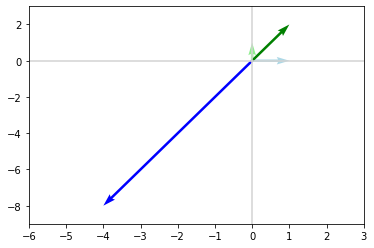

In [84]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6, 3)
plt.ylim(-9, 3)

In [86]:
lambdas, V = np.linalg.eig(N)
lambdas # one eigenvalue is zero, than the product is zero

array([-2.,  0.], dtype=float32)

Lets see another example!
- if $|det(X)| = 1$, then $X$ preserves the volume exactly

In [87]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [88]:
np.linalg.det(J)

-1.0

In [89]:
np.abs(np.linalg.det(J))

1.0

In [91]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

(-1.0, 3.0)

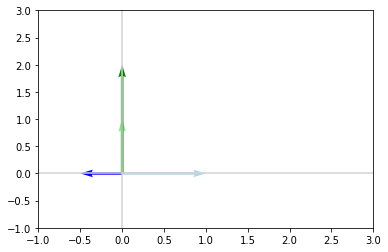

In [93]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
plt.ylim(-1, 3)

the volume is the same!
one vector is short than the other, so the volume is conserved!

### Eigendecomposition

$A = V \Lambda V^{-1}$

$V$ is the concatenation of all eigenvector of $A$

$\Lambda$ is the diagonal matrix $diag(\lambda)$

- the decomposition of a matrix into eigenvectors and eigenvalues reveals characteristics of the matrix:
- Matrix is singular if and only if any of its eigenvalues are zero
     - Optimization of quadratic expressions:
          - Max of $f(x)$
          - Min of $f(x)$

In [95]:
A = np.array([[4, 2], [-5, -3]])
A

array([[ 4,  2],
       [-5, -3]])

In [96]:
lambdas, V = np.linalg.eig(A)

In [102]:
V # two eigenvectors, one each column

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [99]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [101]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

Verifying that $A = V \Lambda V^{-1}$:

In [103]:
np.dot(V, np.dot(Lambda, Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

In **machine learning**, we are working often with real symmetric matrices, which can be decomposed into real-only eigenvectors and real-only eigenvalues. If, as in ML most of the time, the matrix $A$ is real and symmetric, then:

$A = Q \Lambda Q^{-1}$

where $Q$ is analogous to $V$ but an orthogonal matrix.

In [106]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [107]:
lambdas, Q = np.linalg.eig(A)

In [108]:
lambdas

array([3., 1.])

In [110]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [112]:
Q # two eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [113]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[2., 1.],
       [1., 2.]])

**Exercises**

$S = Q \Lambda Q^T$

In [143]:
S = torch.tensor([[25, 2, -5], [2, -2, 1], [-5, 1, 4.]])
S

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [-5.,  1.,  4.]])

In [144]:
lambdas, Q = torch.linalg.eig(S)

In [145]:
lambdas

tensor([26.2361+0.j,  3.2435+0.j, -2.4796+0.j])

In [146]:
Q

tensor([[ 0.9744+0.j,  0.1943+0.j, -0.1132+0.j],
        [ 0.0614+0.j,  0.2548+0.j,  0.9651+0.j],
        [-0.2163+0.j,  0.9473+0.j, -0.2363+0.j]])

In [147]:
Lambda = torch.diag(lambdas)
Lambda

tensor([[26.2361+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  3.2435+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -2.4796+0.j]])

In [148]:
torch.matmul(Q, torch.matmul(Lambda, Q.T))

tensor([[25.0000+0.j,  2.0000+0.j, -5.0000+0.j],
        [ 2.0000+0.j, -2.0000+0.j,  1.0000+0.j],
        [-5.0000+0.j,  1.0000+0.j,  4.0000+0.j]])

$P = V \Lambda V^{-1}$

In [153]:
P = torch.tensor([[25, 2, -5], [2, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [ 5.,  7.,  4.]])

In [155]:
lambdas, V = torch.linalg.eig(P)
Lambda = torch.diag(lambdas)
np.dot(V, torch.matmul(Lambda, torch.linalg.inv(V)))

array([[25.00001   +0.j,  2.000002  +0.j, -5.        +0.j],
       [ 2.0000007 +0.j, -1.9999996 +0.j,  0.99999934+0.j],
       [ 5.0000014 +0.j,  6.9999995 +0.j,  4.0000005 +0.j]],
      dtype=complex64)

<div>
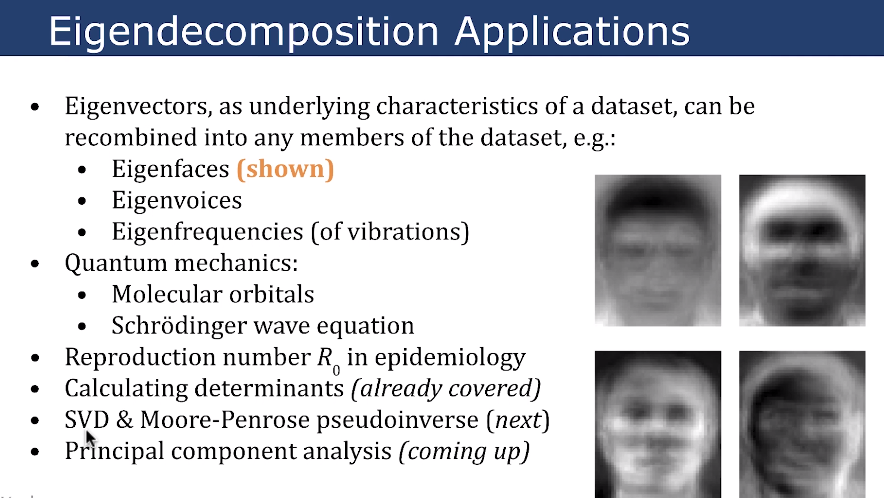
</div>

## Matrix Operations for Machine Learning

### Single Value Decomposition (SVD)

**Important**: while $eigendecomposition$ is applicable to square matrix only, $SVD$ is applicable to any real-valued matrix

- Decomposes matrix into singular vectors (analogous to eigenvectors) and singular values (analogous to eigenvalues)
- For a matrix $A$, its $SVD$ is $A=UDV^T$

<div>
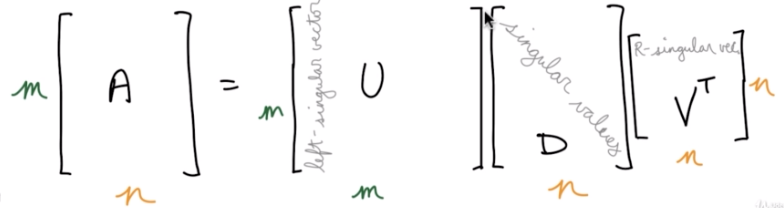
</div>

In [156]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [158]:
U, d, VT = np.linalg.svd(A) # V is already transposed

In [159]:
U # each column is a left singular vector

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [160]:
d # vector 

array([8.66918448, 4.10429538])

In [162]:
np.diag(d) # not with the same shape of A

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [164]:
D = np.concatenate((np.diag(d), [[0, 0]]), axis=0) # just adding two zeros on the bottom
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [161]:
VT # the rows correspond to the right singular vectors

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [165]:
np.dot(U, np.dot(D, VT)) # we obtain again matrix A

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

SVD and eigendecomposition are very similar! 
- Left-singular vector of $A$ = eigenvectors of $AA^T$
- Right-singular vectors of $A$ = eigenvectors of $A^TA$
- Non-zero singular vectors of $A$ = square roots of eigenvectors of $AA^T$ = square roots of eigenvectors of $A^TA$

In [166]:
P

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [ 5.,  7.,  4.]])

In [167]:
U, d, VT = np.linalg.svd(P)

In [168]:
U

array([[-0.97854   ,  0.18800265,  0.08434699],
       [-0.05974835,  0.13287516, -0.98933023],
       [-0.19720432, -0.9731388 , -0.11879081]], dtype=float32)

In [169]:
VT

array([[-0.98017734, -0.12336117,  0.15503016],
       [ 0.01223093, -0.818683  , -0.57411546],
       [-0.19774412,  0.5608388 , -0.80396336]], dtype=float32)

In [171]:
D = np.concatenate((np.diag(d), [[0, 0, 0]]), axis=0) # just adding two zeros on the bottom
D

array([[26.08611488,  0.        ,  0.        ],
       [ 0.        ,  8.18597317,  0.        ],
       [ 0.        ,  0.        ,  2.34616208],
       [ 0.        ,  0.        ,  0.        ]])

In [175]:
eigenva, eigenvec = np.linalg.eig(np.dot(P, P.T))

In [176]:
eigenvec

array([[ 0.97854   ,  0.18800265,  0.08434699],
       [ 0.05974835,  0.13287516, -0.98933023],
       [ 0.19720432, -0.9731388 , -0.11879081]], dtype=float32)

In [177]:
eigenva2, eigenvec2 = np.linalg.eig(np.dot(P.T, P))

In [178]:
eigenvec2

array([[ 0.98017734,  0.19774412, -0.01223093],
       [ 0.12336117, -0.5608388 ,  0.818683  ],
       [-0.15503016,  0.80396336,  0.57411546]], dtype=float32)

In [179]:
np.sqrt(eigenvec2)

c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[0.99003905, 0.4446843 ,        nan],
       [0.3512281 ,        nan, 0.904811  ],
       [       nan, 0.89664006, 0.7577041 ]], dtype=float32)

In [180]:
np.sqrt(eigenvec)

c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[0.9892118 , 0.4335927 , 0.29042554],
       [0.24443476, 0.36452046,        nan],
       [0.44407693,        nan,        nan]], dtype=float32)

In [181]:
D

array([[26.08611488,  0.        ,  0.        ],
       [ 0.        ,  8.18597317,  0.        ],
       [ 0.        ,  0.        ,  2.34616208],
       [ 0.        ,  0.        ,  0.        ]])

### Image Compression via SVD

In [182]:
from PIL import Image

In [186]:
! wget https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg

--2022-12-13 20:01:15--  https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 419564 (410K) [image/jpeg]
Saving to: 'oboe-with-book.jpg'

     0K .......... .......... .......... .......... .......... 12%  129K 3s
    50K .......... .......... .......... .......... .......... 24%  123K 2s
   100K .......... .......... .......... .......... .......... 36% 73.6K 3s
   150K .......... .......... .......... .......... .......... 48% 63.7K 2s
   200K .......... .......... .......... .......... .......... 61% 29.4K 3s
   250K .......... .......... .......... .......... .......... 73%  109K 2s
   300K .......... .......... .......... .......... .......... 85% 73.1K 1s
 

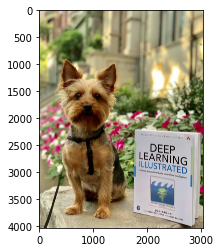

In [187]:
img = Image.open('oboe-with-book.jpg')
plt.imshow(img)

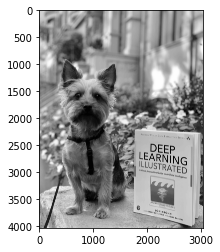

In [188]:
imggray = img.convert('LA')
plt.imshow(imggray)

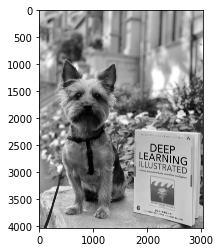

In [190]:
# converting to numpy
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.imshow(imgmat, cmap='gray')

Calcuate SVD of the image!

In [191]:
U, sigma, V = np.linalg.svd(imgmat)

In [193]:
U

matrix([[-0.01787582, -0.0001602 , -0.02330867, ...,  0.00262859,
         -0.02036783,  0.00097622],
        [-0.01787685, -0.00015928, -0.02330477, ...,  0.00198962,
          0.02844283,  0.05239442],
        [-0.01787854, -0.00015913, -0.02329252, ..., -0.0070963 ,
         -0.01722256, -0.01995627],
        ...,
        [-0.01791434,  0.01520734, -0.03528479, ...,  0.07048048,
         -0.01524842, -0.01380374],
        [-0.01789226,  0.01507538, -0.0360428 , ..., -0.02723057,
          0.05318333, -0.01712238],
        [-0.01788418,  0.01500443, -0.03659703, ..., -0.00603476,
         -0.03415861,  0.02184452]])

In [195]:
sigma

array([4.96714889e+05, 7.83359467e+04, 5.82409837e+04, ...,
       7.53866372e-01, 7.35237998e-01, 7.27813081e-01])

In [196]:
V

matrix([[-0.01930991, -0.01931119, -0.01931284, ..., -0.01569129,
         -0.01566452, -0.01565299],
        [-0.00373602, -0.00377749, -0.00384019, ...,  0.0247582 ,
          0.02480378,  0.02481136],
        [-0.00071143, -0.00068262, -0.00068642, ..., -0.01122618,
         -0.01116414, -0.01113031],
        ...,
        [-0.03649059,  0.06283105,  0.03381148, ..., -0.00114647,
          0.0106851 , -0.00750605],
        [-0.09120752,  0.1083937 ,  0.030967  , ..., -0.00322385,
         -0.0020145 ,  0.00405458],
        [ 0.0673    , -0.07630528, -0.06711846, ...,  0.01444552,
         -0.00170599, -0.00709181]])

**important**: as the singular values are arranged in descending order, the most important eigenvectors are the first right-singular vector and the first left-singular vector! This is interesting to reconstruct the image only using these vectors :)

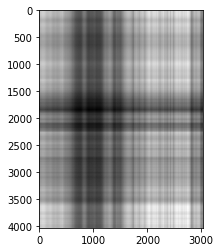

In [194]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :]) 
# first left, first right and first singular value
plt.imshow(reconstimg, cmap='gray')
# it is a start but it does not look like the imgae, so we can add more singular vectors

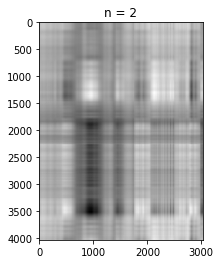

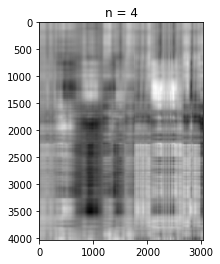

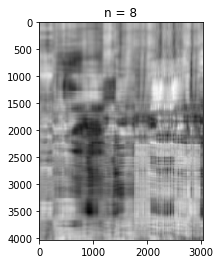

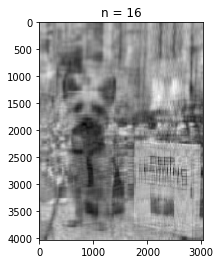

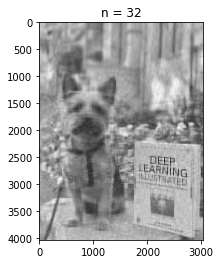

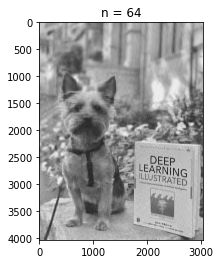

In [197]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = 'n = %s' % i
    plt.title(title)
    plt.show()

Lets check now the sizes of the images!
The 64 singular vectors one is quite good already...

In [199]:
imgmat.shape

(4032, 3024)

In [201]:
full = 4031 * 3024
full

12189744

In [203]:
svd64 = 64*4032 + 64 + 64 * 3024
svd64

451648

In [204]:
svd64/full # 3.7% of the original datapoint!

0.03705147540424147

**Conclusion**: 
- possible to reduce the size of many kinds of data (images, sounds...)
- we can use this approach to reduce the number of inputs in ML/DL, and make the model more efficient and faster

### The Moore-Penrose Pseudoinverse

Some revision on matrix inversion:

<div>
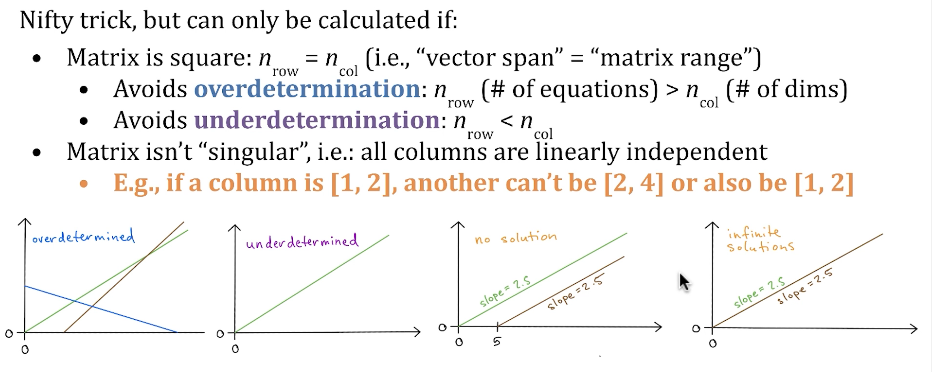
</div>

Solving this system of equations can be done using "another" approach: **the Moore-Pensorse Pseudoinverse**
meaning when a matrix cannot be inverted, we can use this approach to find the solutions!

For some matrix $A$, its pseudoinverse $A^+$ can be calculated by:

$A^+=VD^+U^T$

where, $U$, $D$ and $V$ are the SVD of $A$, and $D^+=(D$ with reciprocal of all-non zero elements$)^T$

In [206]:
A # not squared, not inversible but pseudoinversible

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [207]:
U, d, VT = np.linalg.svd(A)

In [208]:
U # left singular vectors of A

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [211]:
d # singular values of A

array([8.66918448, 4.10429538])

In [212]:
VT # right singular values of A

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [214]:
# to obtain D+
D = np.diag(d)
Dinv = np.linalg.inv(D)
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

In [217]:
# to have the right dimensions of A 3x2
Dplus = np.concatenate((Dinv, np.array([[0,0]]).T), axis=1)
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

Now to finally calculate $A^+$ with $VD^+U^T$:

In [219]:
np.dot(VT.T, np.dot(Dplus, U.T))
# this is the pseudoinverse!

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

But of course numpy has a imbeded method to calculate the pseudoinverse:

In [220]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

Now with PyTorch:

In [224]:
A_p = torch.tensor([[-1,  2],
                    [ 3, -2],
                    [ 5.,  7]])
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [225]:
# direct method
torch.pinverse(A_p)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

In [227]:
# longer method
U, d, VT = torch.linalg.svd(A_p)

In [228]:
U

tensor([[ 0.1271,  0.4741,  0.8713],
        [ 0.0016, -0.8785,  0.4778],
        [ 0.9919, -0.0593, -0.1124]])

In [229]:
d

tensor([8.6692, 4.1043])

In [230]:
VT

tensor([[ 0.5580,  0.8298],
        [-0.8298,  0.5580]])

In [236]:
Dinv = torch.linalg.inv(torch.diag(d))
Dplus = torch.concatenate((Dinv, torch.tensor([[0,0]]).T), axis=1)
Dplus

tensor([[0.1154, 0.0000, 0.0000],
        [0.0000, 0.2436, 0.0000]])

In [237]:
torch.matmul(VT.T, torch.matmul(Dplus, U.T))

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

### Regression with the pseudoinverse (MPP)
- non-square matrices are common in ML
- we saw that we can use the inversed matrix to solve the linear equations to predict $y$, as:

$Xw=y$

$w=X^{-1}y$

however, this is only possible if the matrix is squared, otherwise we cannot invert the matrix.

this is where the MPP comes into hand: we can now estimate model weights $w$ if $n \ne m$ by doing,

$w = X^+y$

<div>
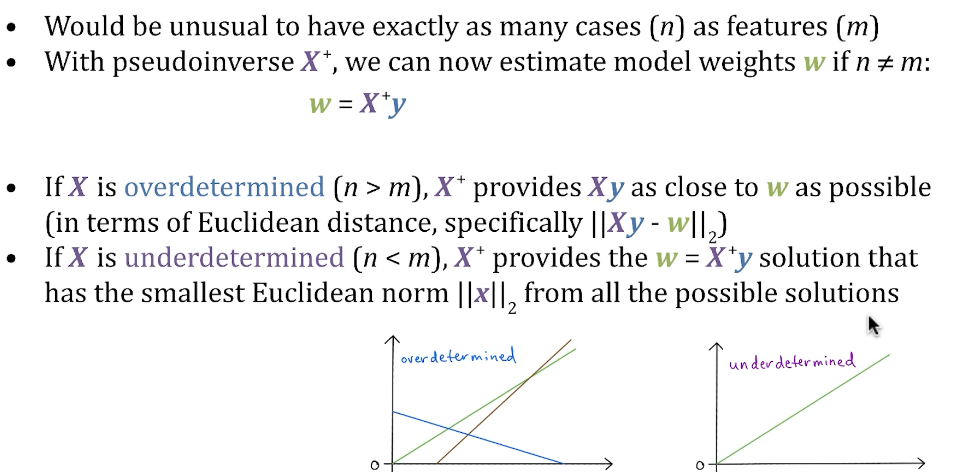
</div>

In a regression problem in real life, we have many more cases (meaning, we have many more rows or $n$'s of $X$) than fetaures to predict ($m$, or columns of $X$).

In [239]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # feature values
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # labels

In [240]:
title = 'Clinical Trial'
xlabel = 'Feature Values (Drug dosage (mL))'
ylabel = ' Labels (Forgetfulness)'

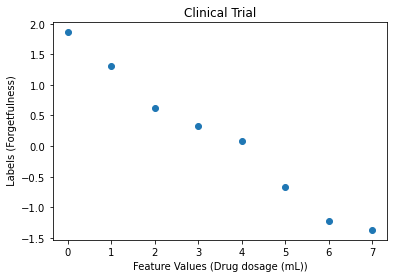

In [241]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
ax.scatter(x1, y)

# lets say the higher the dosage the less forgetfull is the patient

Lets set the x0 to ones, so we can have a y-intercept, just like:
<pre>

<div>
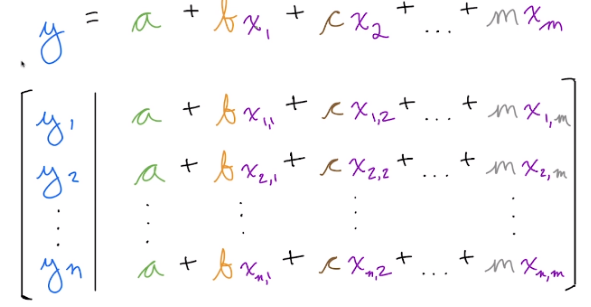
</div>
</pre>

In [245]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [246]:
# lets put them together to form a matrix of features
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

we know that we need to solve $w=X^+y$:

In [247]:
w = np.dot(np.linalg.pinv(X), y)
w

matrix([[ 1.76      , -0.46928571]])

its just like solving for a linear equation!

we now have solved for 'b' ($y$-intercept = 1.76) and 'a' (the first coefficient, angular one). 

In [249]:
# np.dot(np.linalg.pinv(x1), y) # this does not work. thats why we need x0, to have a two-dimensional matrix

In [257]:
b = np.array(w)[0][0]
b

1.7599999999999985

In [260]:
m = np.array(w)[0][1]
m

-0.4692857142857139

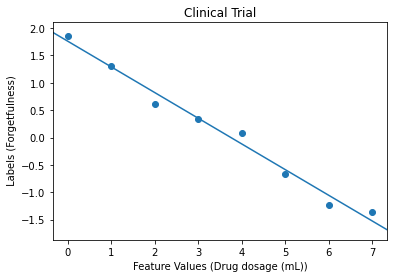

In [266]:
# lets plot the fit now
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_min, y_max = m*x_min + b, m*x_max + b

ax.set_xlim([x_min, x_max])
ax.plot([x_min, x_max], [y_min, y_max])

### Trace Operator

- simply the sum of the diagonal elements of the matrix!

$\sum_iA_{i, j}$

some useful properties are:

- Tr$(A) = $Tr$(A^T)$

- Tr$(ABC) = $Tr$(CAB)$ = Tr$(BCA)$

- $||A||_F = \sqrt{Tr(AA^T}$

In [269]:
A = np.array([[25, 2], [5, 4]])
A

array([[25,  2],
       [ 5,  4]])

In [271]:
25 + 4

29

In [272]:
np.trace(A)

29

In [273]:
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [274]:
torch.trace(A_p)

tensor(-3.)

In [275]:
torch.norm(A_p)

tensor(9.5917)

In [278]:
torch.sqrt(torch.trace(torch.matmul(A_p, A_p.T)))

tensor(9.5917)

### Principle Component Analysis
- simple machine learning algorithm
- **unsupervised**: enables identification of structure in unlabeled data
- another method, such ad eigendecomposiition and SVD, also allows compression

In [279]:
from sklearn import datasets
iris = datasets.load_iris()

In [280]:
iris.data.shape

(150, 4)

In [284]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [285]:
iris.data[0:6, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [286]:
from sklearn.decomposition import PCA

In [290]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [289]:
X = pca.fit_transform(iris.data)
X

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [291]:
X.shape

(150, 2)

In [292]:
X[0:6, :]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

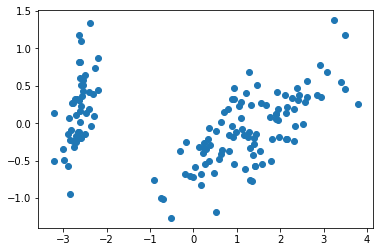

In [293]:
plt.scatter(X[:, 0], X[:, 1])
# it we didnt have the labels, we could presume that we have two different types of sepals

In [295]:
iris.target.shape

(150,)

In [297]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
np.asarray((unique_elements, counts_elements))
# 3 typs of flowers, with 50 elements each

array([[ 0,  1,  2],
       [50, 50, 50]], dtype=int64)

In [298]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

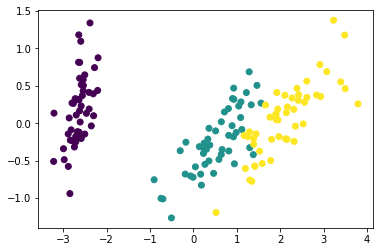

In [299]:
plt.scatter(X[:, 0], X[:, 1], c=iris.target)